<a href="https://colab.research.google.com/github/Ambg0231/DeepLearning/blob/main/%5BTALLER%5D_Customized_loss_functions_and_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/acubillosunal/UBM-DEEP-LEARNING-1/blob/main/U2.04%20-%20%5BTALLER%5D%20Customized%20loss%20functions%20and%20regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

# Taller - Customized loss function

**Ángela Burgos, Sandra Escobar**


In [8]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-DEEP-LEARNING-1/main/init.py
import init; init.init(force_download=False);

## Loading the Fashion MNIST database...

In [9]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import tensorflow as tf
tf.__version__

'2.17.0'

In [10]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [11]:
import tensorflow as tf
from tensorflow.keras import utils
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# convert list of labels to binary class matrix
y_trainOHE = utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

## TASK 1. Basic model

Define a new model using the keras sequential API. The model must have four hidden layers with the following neurons `[128,64,32,16]`. Comply with the following:

- For all the hidden layers use the `relu` activation function.
- Use `nb_classes` and `softmax` activation for the output layer.
- Specify all activations as part of the `Dense` layer parameter, not as a separate layer.
- You must return an instance of a `Sequential` model.
- **DO NOT** invoke `compile` or `fit`.

Your model structure should be as follows

<pre>
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_308 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_309 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_310 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_311 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_312 (Dense)            (None, 10)                170       
=================================================================
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_________________________________________________________________

</pre>

In [12]:
def get_basic_model(input_dim, nb_classes):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense

    model = Sequential()
    model.add(Dense(128, input_shape=(784,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(nb_classes, activation='softmax'))

    return model

In [13]:
model = get_basic_model(input_dim=784, nb_classes=10)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

Run the following cells to train and test the model.

In [14]:
model = get_basic_model(input_dim=784, nb_classes=10)

In [15]:
from tensorflow.keras import regularizers, optimizers

# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_trainN[:500,:], y_trainOHE[:500,:], epochs=1000, batch_size=16, validation_split=0, verbose=0)

preds = model.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = %.2f%s'%(Accuracy*100, '%'))

Accuracy = 78.26%


**UNGRADED TASK**: Create a graph with the histogram of the network weigths in the first hidden layer. It should look like the the following.

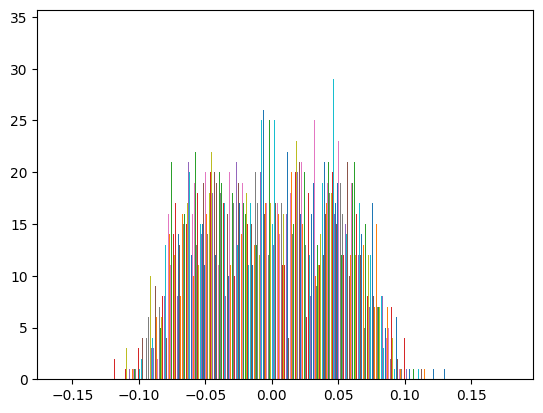

In [16]:
first_layer_weights = model.layers[0].get_weights()[0]

# Create histogram
plt.hist(first_layer_weights, bins=100)

# Display the plot
plt.show()

## TASK 2: $L_2$ regularization

Create a model like on TASK 1, but include $L_2$ regularization to every hidden layer (in `kernel_regularizer`) with a regularization parameter equal to 0.001.

Use [tf.keras.regularizers.L2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L2)

In [17]:
def get_L2_model(input_dim, nb_classes):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras import regularizers
    model = Sequential()

    model = Sequential()
    model.add(Dense(128, input_shape=(784,), activation='relu', kernel_regularizer=regularizers.L2(0.001)))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
    model.add(Dense(nb_classes, activation='softmax'))

    return model

In [18]:
model = get_L2_model(784, 10)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

inspect layer regularizers

In [19]:
for layer in model.layers:
    print (layer.name, '-->', layer.kernel_regularizer)

dense_10 --> <keras.src.regularizers.regularizers.L2 object at 0x79b9b32bfee0>
dense_11 --> <keras.src.regularizers.regularizers.L2 object at 0x79b9b2e03550>
dense_12 --> <keras.src.regularizers.regularizers.L2 object at 0x79b9c98af370>
dense_13 --> <keras.src.regularizers.regularizers.L2 object at 0x79b9b2e03010>
dense_14 --> None


Run the following cell to train and test the model

In [20]:
from tensorflow.keras import optimizers
model = get_L2_model(784, 10)

# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_trainN[:500,:], y_trainOHE[:500,:], epochs=1000, batch_size=16, validation_split=0, verbose=0)

preds = model.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = %.2f%s'%(Accuracy*100, '%'))

Accuracy = 77.93%


**UNGRADED TASK**: Create a graph with the histogram of the network weigths in the first hidden layer. It should look like the the following.

Compare it with the histogram obtained in the previous exercise. Is there any effect due to the regularization?

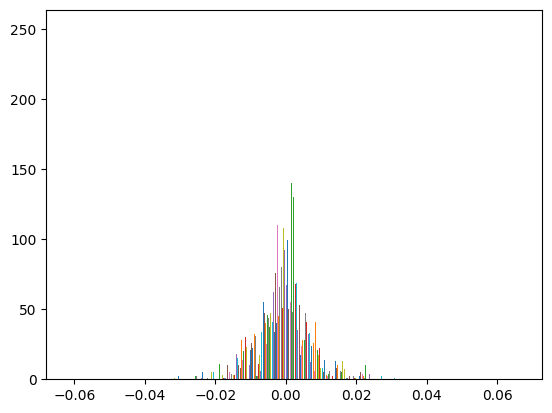

In [21]:
first_layer_weights = model.layers[0].get_weights()[0]

# Create histogram
plt.hist(first_layer_weights, bins=100)

# Display the plot
plt.show()

## TASK 3: $L_1$+$L_2$ regularization

Create a model like on TASK 1, but use $L_1$+$L_2$ regularization to every hidden layer (in `kernel_regularizer`) with both regularization parameters equal to 0.0001.

Use [tf.keras.regularizers.L1L2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1L2)

In [22]:
def get_L1L2_model(input_dim, nb_classes):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras import regularizers
    model = Sequential()

    model = Sequential()
    model.add(Dense(128, input_shape=(784,), activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

In [23]:
model = get_L1L2_model(784, 10)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,514 (435.60 KB)

 Trainable params: 111,514 (435.60 KB)

 Non-trainable params: 0 (0.00 B)

inspect layer regularizers

In [24]:
for layer in model.layers:
    print (layer.name, '-->', layer.kernel_regularizer)

dense_20 --> <keras.src.regularizers.regularizers.L1L2 object at 0x79b9b77c6920>
dense_21 --> <keras.src.regularizers.regularizers.L1L2 object at 0x79b9b77c5990>
dense_22 --> <keras.src.regularizers.regularizers.L1L2 object at 0x79b9b2e17940>
dense_23 --> <keras.src.regularizers.regularizers.L1L2 object at 0x79b9b77c7e50>
dense_24 --> None


Run the following cell to train and test the model

In [25]:
from tensorflow.keras import optimizers
model = get_L1L2_model(784, 10)

# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_trainN[:500,:], y_trainOHE[:500,:], epochs=1000, batch_size=16, validation_split=0, verbose=0)

preds = model.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = %.2f%s'%(Accuracy*100, '%'))

Accuracy = 71.87%


**UNGRADED TASK**: Create a graph with the histogram of the network weigths in the first hidden layer. It should look like the the following.

Compare it with the histograms obtained in the previous exercises. What is the effect of applying $L_1$ regularization?

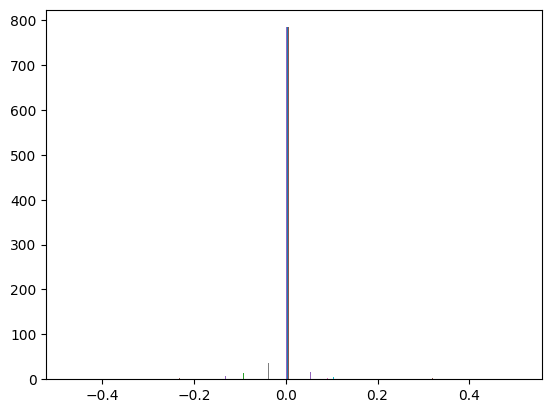

In [27]:
first_layer_weights = model.layers[0].get_weights()[0]

# Create histogram
plt.hist(first_layer_weights, bins=100)

# Display the plot
plt.show()

Create a graph with the histogram of the network weigths in the first hidden layer. Compare it with the histograms obtained in the previous exercises. What is the effect of applying $L_1$ regularization?

### TASK 4: Customized loss function

Complete the function below to implement the following loss function:

$$\mathcal{L}({\bf{\hat{y}}},{\bf{y}}) = -\frac{1}{N}\sum_{i=1}^N \sum_{j=1}^C {\bf{1}}_{y_i \in C_j} w_{j}\log p_{model}[y_i \in C_j]$$

which corresponds to a weighted version of the categorical cross entropy loss function (take a look to the [section 2.2](https://rramosp.github.io/2021.deeplearning/content/U2.02%20-%20The%20Multilayer%20Perceptron.html#sequential-models) to remember the notation of the categorical cross-entropy loss function).

Note the following observations:

- the function below **returns a function** tied to a specific set of weights. This way we can create different loss functions tied to different weights.
- you can assume `y_pred` to be the output of a **softmax** layer. This is, that for each `y` there is a predicted probability for each class $\in [0,1]$ and summing all up to 1.
- before using the `tf.mat.log` function, pass `y_pred` through [`tf.clip_by_value`](https://www.tensorflow.org/api_docs/python/tf/clip_by_value) to ensure any value is between `K.epsilon()` and `1-K.epsilon()`. This is to avoid extreme values close to `0` or close to `1` which might cause numerical issues.
- both `y_pred` and `y_true` will be tensors of shape `(m,c)` with `m` being the number of data points and `c` the number of classes.
- your answer must be accurate up to three decimal number.
- use [`tf.reduce_mean`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean) for the first summation, and [`tf.reduce_sum`](`https://www.tensorflow.org/api_docs/python/tf/math/reduce_sum`) for the second summation with the corresponding `axis` argument.

**HINT**: experiment and understand `tf.reduce_mean` and `tf.reduce_sum` before implementing the function

In [28]:
from tensorflow.keras import backend as K
K.epsilon()

1e-07

In [29]:
z = np.random.randint(100, size=(3,5))
print (z)
print (tf.reduce_mean(z))
print (tf.reduce_sum(z, axis=0))

[[68 10 36 17 63]
 [54 12  8 81 51]
 [75 29 69 17 11]]
tf.Tensor(40, shape=(), dtype=int64)
tf.Tensor([197  51 113 115 125], shape=(5,), dtype=int64)


In [87]:
def weighted_categorical_crossentropy(weights):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1 - K.epsilon())
        log_y_pred = tf.math.log(y_pred)
        class_weights = tf.convert_to_tensor(weights, dtype=y_pred.dtype)
        class_weights = tf.reshape(class_weights, [1, -1])
        weighted_log_y_pred = log_y_pred * class_weights
        weighted_losses = y_true * weighted_log_y_pred
        loss_value = -tf.reduce_mean(tf.reduce_sum(weighted_losses, axis=1))

        return loss_value
    return loss


manually test your code with the following cases

In [88]:
y_pred = np.array([[0.14285714, 0.        , 0.68367347, 0.17346939],
                   [0.01020408, 0.60714286, 0.10204082, 0.28061224],
                   [0.1733871 , 0.29435484, 0.24193548, 0.29032258],
                   [0.25403226, 0.24596774, 0.19758065, 0.30241935],
                   [0.52073733, 0.10138249, 0.11981567, 0.25806452],
                   [0.47843137, 0.05882353, 0.24313725, 0.21960784]]).astype(np.float32)

y_true = np.array([[0, 1, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 0, 1],
                   [0, 0, 0, 1],
                   [1, 0, 0, 0],
                   [1, 0, 0, 0]]).astype(np.float32)


loss = weighted_categorical_crossentropy([1,1,1,1])
print ("loss", loss(y_true, y_pred).numpy()) # this should return 3.4066
loss = weighted_categorical_crossentropy([2,3,4,5])
print ("loss", loss(y_true, y_pred).numpy()) # this should return 10.7990


loss 3.4065902
loss 10.7990465


test with random data

In [89]:
m,c = np.random.randint(5)+5,np.random.randint(3)+2
y_true = np.eye(c)[np.random.randint(c, size=m)].astype(int)
y_pred = np.abs(y_true + np.round(np.random.random(size=(m,c)),2)*2 - .5)
y_pred[0,np.argmax(y_true[0])]=0 # force some zero to check clipping
y_pred /= np.sum(y_pred,axis=1).reshape(-1,1).astype(np.float32)

w = np.round(np.random.random(size=c)*10+1,2)

print("y_true:\n", y_true)
print("y_pred:\n", y_pred)
print ("w:", w)

loss = weighted_categorical_crossentropy(w)

print ("\nloss: ", loss(y_true, y_pred).numpy())

y_true:
 [[0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]
y_pred:
 [[1.00000001 0.        ]
 [0.67272726 0.32727272]
 [0.09375    0.90625002]
 [0.01162791 0.98837208]
 [0.06557377 0.93442621]
 [0.43442622 0.56557376]]
w: [ 5.04 10.98]

loss:  31.197712009565013


**UNGRADED TASK**

**Test your loss function in model**. Use the weighted categorical cross entropy function to train the MLP model on the Fashion MNIST dataset with 2 hidden layers of 64 and 32 neurons respectively. Use the two sets of weights below. Evaluate the model with the test dataset and plot the confusion matrix.

Your should get confusion matrices such as the ones below. Left is with `weights0`, center with `weights1` and right with `weights2`. Observe what classes improve their accuracy based on the weights.

In [90]:
weights0 = np.array([1,1,1,1,1,1,1,1,1,1])
weights1 = np.array([1,1,1,1,1,1,4,1,1,1])
weights2 = np.array([1.5,1,1,1,1,1,4,1,1,1])

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_mlp_model(input_dim, nb_classes):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dense(32, activation='relu'),
        Dense(nb_classes, activation='softmax')
    ])
    return model

In [111]:
X_train.shape[1]

784

In [105]:
X_trainN.shape, y_train.shape, nb_classes, X_train.shape

((60000, 784), (60000,), 10, (60000, 784))

In [119]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [122]:
def train_and_evaluate(weights, X_train, y_train, X_test, y_test, nb_classes):
    model = create_mlp_model(input_dim=X_train.shape[1], nb_classes=nb_classes)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=8)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    return y_pred_classes

y_pred0 = train_and_evaluate(weights0, X_trainN, y_trainOHE, X_testN, y_test, nb_classes)
# y_pred1 = train_and_evaluate(weights1, X_trainN, y_trainOHE, X_testN, y_test, nb_classes)
# y_pred2 = train_and_evaluate(weights2, X_trainN, y_trainOHE, X_testN, y_test, nb_classes)

Epoch 1/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8031 - loss: 0.5546
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8702 - loss: 0.3506
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8841 - loss: 0.3126
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8913 - loss: 0.2917
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8979 - loss: 0.2753
Epoch 6/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9033 - loss: 0.2624
Epoch 7/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9072 - loss: 0.2520
Epoch 8/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 0.9079 - loss: 0.2482
Epoch 9/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9146 - loss: 0.2301
Epoch 10/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9155 - loss: 0.2277
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [124]:
def weighted_categorical_crossentropy1(weights):
    def loss(y_test, y_pred0):
        y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1 - K.epsilon())
        log_y_pred = tf.math.log(y_pred)
        class_weights = tf.convert_to_tensor(weights, dtype=y_pred.dtype)
        class_weights = tf.reshape(class_weights, [1, -1])
        weighted_log_y_pred = log_y_pred * class_weights
        weighted_losses = y_true * weighted_log_y_pred
        loss_value = -tf.reduce_mean(tf.reduce_sum(weighted_losses, axis=1))

        return loss_value
    return loss

In [127]:
def confusion_matrix(y_test, y_pred):
    from sklearn.metrics import confusion_matrix
    objects = ('Ankle Boot', 'Bag', 'Sneaker', 'Shirt', 'Sandal', 'Coat', 'Dress', 'Pullover', 'Trouser', 'T-shirt/top')
    cm = confusion_matrix(y_test, y_pred0)
    cm = cm/np.sum(cm,axis=1)
    cmap = plt.cm.Blues
    tick_marks = np.arange(nb_classes)
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                           ha="center", va="center", color="w")
    plt.title('Normalized confusion matrix')
    fig.colorbar(im)
    plt.xticks(tick_marks, objects, rotation=45)
    plt.yticks(tick_marks, objects)
    plt.show()

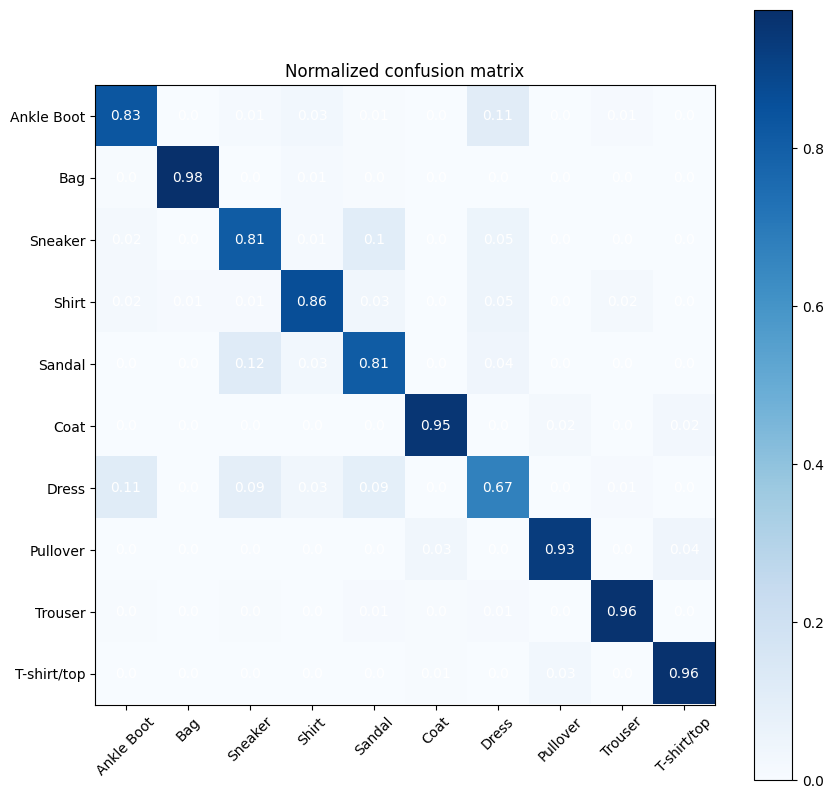

In [128]:
confusion_matrix(y_test, y_pred0)